# Movie Genre Classification :

  - To classify movies into various genres based on the Story of the Movie
  
  -  Database used : MovieLens Data. However Movielens Dataset is mainly used for Movie Recomendation, So They do not contain the full Movie plot. So I downloaded the plot from Wikipedia.
  
  - Used MovieLens 20m Dataset(https://grouplens.org/datasets/movielens/)
  
  - There is a better Dataset with 58k Movies, but I didn't do it cos of the time it will take to fetch the Plot for all the movies.
  
  - This is a multilabel Classification Model.
  
  - Used two different encoding Schemes: Google's Word2Vec and Glove Word embeddings to encode the plot.

**Download The Dataset**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import urllib.request
import sys
import time
import urllib

urllib.request.urlretrieve('http://files.grouplens.org/datasets/movielens/ml-20m.zip', 'ml-20m.zip')

('ml-20m.zip', <http.client.HTTPMessage at 0x7fac5257d4a8>)

In [0]:
!unzip ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [0]:
movie = pd.read_csv('ml-20m/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
movie.shape

(27278, 3)

- The Plot of the Story is not available in the dataset, So will use Python's Wikipedia Package to get the Plot for the movies.
 
- Movie Plot is usually present in Plot section of Movies. However all movie plots are not in Plot section. SOme are in Plot summary, Summary, Synopsis etc.


In [0]:
pip install wikipedia

In [0]:
import wikipedia

In [0]:
#section = wikipedia.WikipediaPage('Toy Story').section('Plot')
section = wikipedia.WikipediaPage('Heat (1995 film)').section('Plot')

In [0]:
section

"Professional thief Neil McCauley lives by a personal code: have nothing in your life you cannot leave behind if you need to escape the police. He and his crew – Chris Shiherlis, Michael Cheritto and Trejo – hire Waingro to help rob $1.6 million in bearer bonds from an armored car. During the heist, Waingro impulsively kills a guard. Another guard reaches for his concealed pistol, forcing the crew to kill him as well. McCauley gives the order to kill the third guard so as not to leave an eyewitness, but is incensed with Waingro for the needless escalation. McCauley's crew prepares to kill Waingro, but are distracted by a passing police cruiser, and he escapes.\nMcCauley begins a relationship with Eady. His fence, Nate, suggests he sell the stolen bonds back to their original owner, money launderer Roger Van Zant, who could profit by claiming the insurance on the bonds. Van Zant agrees, but instructs his men to ambush McCauley at the meeting. McCauley survives the ambush, killing both o

In [0]:
section = wikipedia.WikipediaPage("The Good Earth (film)").section('Plot')

In [0]:
section

'In pre-World War I northern China, young farmer Wang Lung (Paul Muni) marries O-Lan (Luise Rainer), a slave at the Great House, the residence of the most powerful family in their village. O-Lan proves to be an excellent wife, hard working and uncomplaining. Wang Lung prospers. He buys more land, and O-Lan gives birth to two sons and a daughter. Meanwhile, the Great House begins to decline.\nAll is well until a drought and the resulting famine drive the family to the brink. O-Lan gives birth to a second daughter but kills her shortly after birth to spare her from starvation. Desperate, Wang Lung considers the advice of his pessimistic, worthless uncle (Walter Connolly) to sell his land for food, but O-Lan opposes it. Instead, they travel south to a city in search of work. The family survives by begging and stealing. When a revolutionary gives a speech to try to drum up support for the army approaching despite rain in the north, Wang Lung and O-Lan realize the drought is over. They long

In [0]:
section = wikipedia.WikipediaPage("Eight Miles High (film)").section('Film Synopsis')
section

'Obermaier enjoyed sexual freedom at the legendary Kommune 1 in Berlin after being with the krautrock band  Bröselpilze. In the Kommune, she becomes friendly with Rainer Langhans. The young woman from Munich gains employment as a model, and becomes a sex symbol and youth icon. Now a cover girl in Playboy magazine, she meets rock stars such as Mick Jagger and Keith Richards, while Italian film producer, Carlo Ponti, offers her a ten-year contract, but she declines: her freedom is more important than a contract.\nDuring her intensive relationship with Keith Richards, she begins to recognize the dark side of the shiny glamour world she lives in: the isolation of the stars, and the groupie-populated milieux of anonymous hotel rooms — this is not her idea of life.\nShe finds new freedom in a relationship with the adventurer Dieter Bockhorn (David Scheller). They fall in love and go on a six-year road trip around the world. Later, Bockhorn dies in a motorcycle accident in Mexico.'

In [0]:
section = wikipedia.WikipediaPage("Fanatic (1965 film)").section('Plot details')
section

"An American woman, Patricia Carroll (Powers), arrives in London to marry her lover Alan Glentower (Kaufmann). Before tying the knot, however, Patricia pays a visit to Mrs. Trefoile (Bankhead), the mother of her deceased fiancé Stephen, who died in an automobile accident several years earlier. Trefoile resides in a secluded house on the edge of an English village. She is fanatically religious, and it soon becomes apparent that she blames Patricia for her son's death. Indeed, when Patricia reveals to her that she never actually intended to marry Stephen, Trefoile enlists the aid of her servants, Harry (Vaughn) and Anna (Joyce), in holding Patricia captive so she can exorcise the young woman's soul. After several attempts to escape the Trefoile house, one of which nearly results in Patricia's being sexually assaulted by Harry, she is rescued by Alan; and in the end, Mrs. Trefoile winds up dead with a knife in her back -- the same knife with which she earlier attempted to murder Patricia.

In [ ]:
movie_df = pd.read_csv('ml-20m/movies.csv')

In [0]:
import wikipedia
def get_plot(ap):
  try:
    be_be = wikipedia.search(ap)
  except:
    return np.nan
  #plot = []
  #import nltk
  #dist = []
  #for i in be_be:
  #  dist.append(nltk.edit_distance(i, ap))
  indx = 0
  try:
    section = wikipedia.WikipediaPage(be_be[indx]).section('Plot')
  except:
    return np.nan
  if(section==None):
    try:
      section = wikipedia.WikipediaPage(be_be[indx]).section('Synopsis')
    except:
      return np.nan
  if(section==None):
    try:
      section = wikipedia.WikipediaPage(be_be[indx]).section('Plot synopsis')
    except:
      return np.nan
  if(section==None):
    try:
      section = wikipedia.WikipediaPage(be_be[indx]).section('Plot summary')
    except:
      return np.nan
  if(section==None):
    try:
      section = wikipedia.WikipediaPage(be_be[indx]).section('Film Synopsis')
    except:
      return np.nan
  return section

In [0]:
from tqdm import tqdm
plt_arr = []
for i in tqdm(range(0,1650)):
  if(need.loc[indexx[i]]['genres']=='Documentary'):
    plot=np.nan
  else:
    plot = get_plot(need.loc[indexx[i]]['title'])
  plt_arr.append(plot)
  #movie_df.at[indexx[i],'plot'] = plot

  2%|▏         | 27/1650 [01:34<1:34:41,  3.50s/it]/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
100%|██████████| 1650/1650 [2:11:12<00:00,  5.19s/it]


In [0]:
for i in range(1650):
  movie_df.at[indexx[i],'plot'] = plt_arr[i]

- The above code for 27k movies takes around 24 hours to run. So I ran the code in batches of 1000 on 2 different machines and from some batches, I was able to observe that Most of the films with Documentary returned 'None', So to avoid searching time, I added np.nan to movies with genre = Documentary.

In [0]:
#Save The Batch of Dataset
movie_df.to_csv('movie_plot_final.csv',index=False)

In [0]:
ap = movie_df.loc[indexx[16]]['title']
movie_df.loc[indexx[16]]

movieId                    92781
title      City Dark, The (2011)
genres               Documentary
plot                         NaN
Name: 18642, dtype: object

- This is the output from one of the earliest batches and on manual searching, I found that most of the movies with standalone genre = Documentary had no plots or no wikipedia article.

In [0]:
movie_df.loc[18614]

movieId                                                92670
title      Jodorowsky Constellation, The (La constellatio...
genres                                           Documentary
plot                                                     NaN
Name: 18614, dtype: object

In [0]:
movie_df[movie_df['plot'].isnull()].shape

(7139, 4)

- Even After running the code for hours, it still had 7.1k missing values and So I manually examined as much of the movies as I could and found that most of the movies did not have plot since they are too old and not so famous, Most of the films from foreign laguages also did not have plot, foreign movies that are not so famous.

- Also for some movies that I observed, I filled Plots manually also.

**Load The final Dataset**

In [0]:
movie_df = pd.read_csv('movie_plot_final.csv')

In [0]:
#Taking only Those movies whose plot is not null.
movie_df = movie_df[movie_df['plot'].notnull()]

In [0]:
movie_df.head(5)

,movieId,title,genres,plot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things but pr...
1,2,Jumanji (1995),Adventure|Children|Fantasy,"In 1869, near Brantford, New Hampshire, two bo..."
2,3,Grumpier Old Men (1995),Comedy|Romance,The feud between Max (Walter Matthau) and John...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale is a story about four Black ...
4,5,Father of the Bride Part II (1995),Comedy,The film begins 4 years after the events of th...


**EDA on Genres**

Removing No genres listed

In [0]:
movie_df = movie_df[movie_df['genres']!='(no genres listed)']

In [0]:
genre_count = {}
for i in movie_df['genres']:
  arr = i.split('|')
  for k in arr:
    if(k in genre_count):
      genre_count[k]+=1
    else:
      genre_count[k] = 1

In [0]:
key = []
value = []
for i in genre_count:
  key.append(i)
  value.append(genre_count[i])

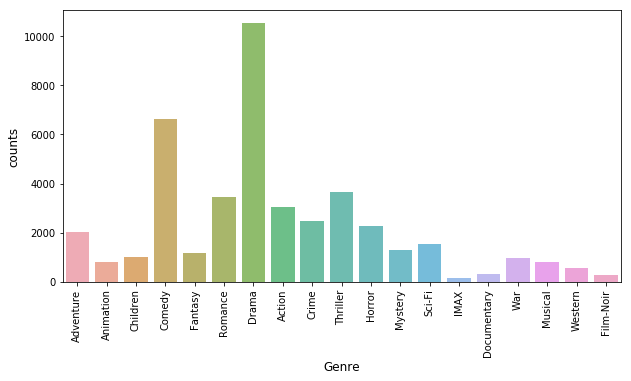

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
#dir_counts = dff['publication'].value_counts()
plt.figure(figsize=(10,5))
g = sns.barplot(key, value, alpha=0.8)
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('counts',fontsize=12)
plt.show()

**Have an Imbalanced Dataset here, Most of the movies considered are Drama, The reason maybe because of the fact the most of the movies in the movie lens data are from years<99.**

- I will remove IMAX and Documentary from this. Because IMAX is too less and so is Documentary, since I removed the standalone Documentary, it must be from those movies with multiple genres.

In [0]:
new_genres = []
for i in movie_df['genres']:
  arr = i.split('|')
  str1 = ''
  for k in arr:
    if(k!='IMAX'):
      str1=str1+'|'+k
  str1 = str1.lstrip('|')
  new_genres.append(str1)

In [0]:
movie_df['genres'] = new_genres

In [0]:
new_genres = []
for i in movie_df['genres']:
  arr = i.split('|')
  str1 = ''
  for k in arr:
    if(k!='Documentary'):
      str1=str1+'|'+k
  str1 = str1.lstrip('|')
  new_genres.append(str1)

In [0]:
movie_df['genres'] = new_genres

In [0]:
movie_df = movie_df[movie_df['genres']!='']

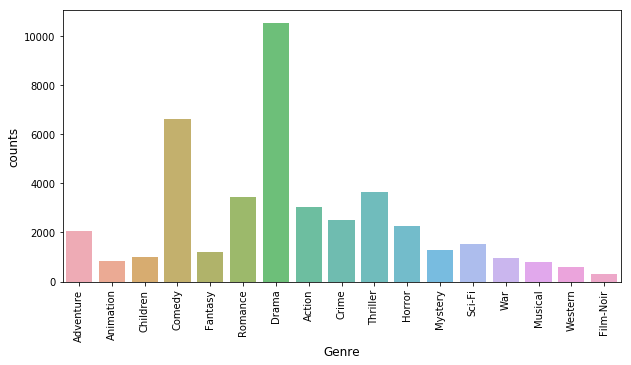

In [0]:
#Plot The Genres once again
genre_count = {}
for i in movie_df['genres']:
  arr = i.split('|')
  for k in arr:
    if(k in genre_count):
      genre_count[k]+=1
    else:
      genre_count[k] = 1
key = []
value = []
for i in genre_count:
  key.append(i)
  value.append(genre_count[i])
  
import seaborn as sns
import matplotlib.pyplot as plt
#dir_counts = dff['publication'].value_counts()
plt.figure(figsize=(10,5))
g = sns.barplot(key, value, alpha=0.8)
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('counts',fontsize=12)
plt.show()

There is an imbalance in dataset, must make sure model doesn't overfit

In [0]:
gen_len = []
for i in movie_df['genres']:
  arr = i.split('|')
  gen_len.append(len(arr))

In [0]:
print('Minimum Genre for a movie = ',min(gen_len))
print('Maximin Genre for a movie = ',max(gen_len))

Minimum Genre for a movie =  1
Maximin Genre for a movie =  8


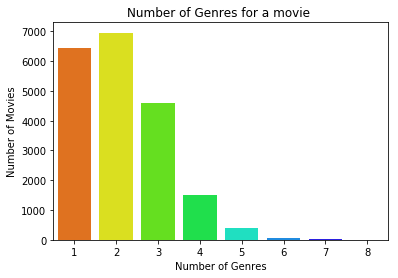

In [0]:
sns.countplot(gen_len, palette='gist_rainbow')
plt.title("Number of Genres for a movie ")
plt.xlabel("Number of Genres")
plt.ylabel("Number of Movies")
plt.show()

**Observation :**

  Most of the movies have only 1,2,3 genres. Very less number of movies have 8 genres

In [0]:
plot_len = []
for i in movie_df['plot']:
  aa = i.split()
  plot_len.append(len(aa))

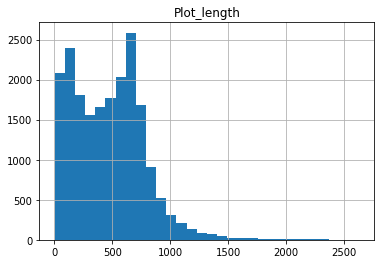

In [0]:
length_df = pd.DataFrame({'Plot_length':plot_len})
length_df.hist(bins = 30)
plt.show()

**Remove movie plots whose length is less than 100** 

In [0]:
movie_df['plot_length']=plot_len
movie_df = movie_df[movie_df['plot_length']>100]

### **Preprocessing Movie Plot**

1 - Converting to Lower case

In [0]:
lower_arr = []
for i in movie_df['plot']:
  lower_string = i.lower()
  lower_arr.append(lower_string)

2 - Expand Contractions

In [0]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [0]:
#expand Contractions
for i in range(len(lower_arr)):
  exp_cont = ' '.join([contractions[t] if t in contractions else t for t in lower_arr[i].split()])
  lower_arr[i] = exp_cont

In [0]:
movie_df['clean_plot'] = lower_arr

3 - Remove Punctuations

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [0]:
movie_df['clean_plot'] = movie_df['clean_plot'].str.replace('[^\w\s]','')
movie_df['clean_plot'].head()

0    in a world where toys are living things but pr...
1    in 1869 near brantford new hampshire two boys ...
2    the feud between max walter matthau and john j...
3    waiting to exhale is a story about four black ...
4    the film begins 4 years after the events of th...
Name: clean_plot, dtype: object

3 - Remove Stop Words

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
movie_df['clean_plot'] = movie_df['clean_plot'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
movie_df['clean_plot'].head()

0    world toys living things pretend lifeless huma...
1    1869 near brantford new hampshire two boys bur...
2    feud max walter matthau john jack lemmon coole...
3    waiting exhale story four black women good fri...
4    film begins 4 years events first one george ba...
Name: clean_plot, dtype: object

4 - Lemmatization

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from textblob import Word
movie_df['clean_plot'] = movie_df['clean_plot'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
movie_df['clean_plot'].head()

0    world toy living thing pretend lifeless human ...
1    1869 near brantford new hampshire two boy bury...
2    feud max walter matthau john jack lemmon coole...
3    waiting exhale story four black woman good fri...
4    film begin 4 year event first one george bank ...
Name: clean_plot, dtype: object

5 - Remove numbers


In [0]:
import re
def remove_num(x):
  result = re.sub(r'\d+','', x)
  ' '.join(result.split())
  return result

In [0]:
movie_df['clean_plot'] = movie_df['clean_plot'].apply(lambda x: remove_num(x))
movie_df['clean_plot'].head()

0    world toy living thing pretend lifeless human ...
1     near brantford new hampshire two boy bury che...
2    feud max walter matthau john jack lemmon coole...
3    waiting exhale story four black woman good fri...
4    film begin  year event first one george bank t...
Name: clean_plot, dtype: object

In [0]:
movie_df.to_csv('cleaned_data.csv',index=False)

In [0]:
movie_df = pd.read_csv('cleaned_data.csv')

# Modelling

Encoding The Labels using a one-hot-encoding

  Not using the sklean version. This is custom implementation
  
  This problem is a Multilabel Classification Problem

In [0]:
cols = [i for i in genre_count]

In [0]:
y_df = pd.DataFrame(columns=cols)
y_df

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Western,Film-Noir


In [0]:
l = 0
for i in movie_df['genres']:
  need_dict = dict.fromkeys(cols,0)
  i = i.split('|')
  for k in i:
    need_dict[k] = 1
  y_df.loc[l] = need_dict
  l+=1

In [0]:
#Save The Labels
y_df.to_csv('movie_labels.csv',index=False)

In [0]:
#Load The Labels
y_df = pd.read_csv('movie_labels.csv')

In [0]:
X = movie_df[['title','clean_plot']]
y = y_df.values

In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
X_train = X_train1['clean_plot']
X_test = X_test1['clean_plot']

### Using Word2Vec Word Embedding

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 200000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [36]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 110777 unique tokens


In [37]:
#loading Word2Vec Model
from gensim.models import KeyedVectors
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.vocab))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Found 3000000 word vectors of word2vec


In [0]:
#Creating Embedding Matrix
EMBEDDING_DIM=300
nb_words = min(MAX_NB_WORDS, len(word_index))+1
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in word2vec.vocab:
        embedding_matrix[i] = word2vec.word_vec(word)

In [0]:
embedding_matrix.shape

(110778, 300)

In [0]:
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,Bidirectional,Conv1D
from keras.layers import Input

**One-Directional LSTM**

In [0]:
input_layer = Input(shape=(maxlen,))

embedding_layer = Embedding(nb_words, EMBEDDING_DIM,input_length=300, weights=[embedding_matrix], trainable=False)(input_layer)

lstm1 = LSTM(256,return_sequences=True)(embedding_layer)


lstm2 = LSTM(128,return_sequences=True)(lstm1)

drop = Dropout(0.2)(lstm2)

flat = Flatten()(drop)


dense1 = Dense(64, activation='relu')(flat)



out_layer = Dense(17, activation='sigmoid')(dense1)

model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 300, 300)          33233400  
_________________________________________________________________
lstm_25 (LSTM)               (None, 300, 256)          570368    
_________________________________________________________________
lstm_26 (LSTM)               (None, 300, 128)          197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 128)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 38400)             0         
_________

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=5, mode='max', baseline=None, restore_best_weights=True)

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_data=(X_test,y_test),callbacks=[es])

Train on 14072 samples, validate on 3519 samples
Epoch 1/30
14072/14072 [==============================] - 144s 10ms/step - loss: 0.2818 - acc: 0.8848 - val_loss: 0.2407 - val_acc: 0.8999
Epoch 2/30
14072/14072 [==============================] - 142s 10ms/step - loss: 0.2273 - acc: 0.9051 - val_loss: 0.2304 - val_acc: 0.9059
Epoch 3/30
14072/14072 [==============================] - 140s 10ms/step - loss: 0.2121 - acc: 0.9120 - val_loss: 0.2258 - val_acc: 0.9049
Epoch 4/30
14072/14072 [==============================] - 141s 10ms/step - loss: 0.1978 - acc: 0.9181 - val_loss: 0.2244 - val_acc: 0.9060
Epoch 5/30
14072/14072 [==============================] - 143s 10ms/step - loss: 0.1846 - acc: 0.9234 - val_loss: 0.2267 - val_acc: 0.9073
Epoch 6/30
14072/14072 [==============================] - 141s 10ms/step - loss: 0.1681 - acc: 0.9307 - val_loss: 0.2367 - val_acc: 0.9059
Epoch 7/30
14072/14072 [==============================] - 140s 10ms/step - loss: 0.1474 - acc: 0.9400 - val_loss: 0.2

In [0]:
model.evaluate(X_test, y_test, verbose=1)

3519/3519 [==============================] - 52s 15ms/step


[0.22673507922750605, 0.9073433422608685]

In [0]:
from sklearn.externals import joblib
# save the model to disk
filename = '/content/drive/My Drive/lstm_90.sav'
joblib.dump(model, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/lstm_90.sav']

In [0]:
model = joblib.load('lstm_90.sav')

In [0]:
out_arr = model.predict(X_test)

In [0]:
def get_prediction(k):
  pred_arr = []
  for i in out_arr[k]:
    if(i>0.5):
      pred_arr.append(1)
    else:
      pred_arr.append(0)
  return pred_arr

In [0]:
def retrieve_genre(arr):
  plot_str = ''
  for i in range(len(arr)):
    if(arr[i]==1):
      plot_str = plot_str+' | '+y_df.columns[i]
  return plot_str.lstrip(' | ')

In [0]:
df = pd.DataFrame(columns=['Original Genre','Predicted Genre'])

In [55]:
for i in range(50):
  ori_gen = retrieve_genre(y_test[i])
  pred_gen = get_prediction(i)
  pred_gen = retrieve_genre(pred_gen)
  df.loc[i] = [ori_gen,pred_gen]
titl = list(X_train1['title'].head(50).values)
df['title'] = list(titl)
df

,Original Genre,Predicted Genre,title
0,Comedy,Comedy,"First Beautiful Thing, The (La prima cosa bell..."
1,Drama,Drama,Terms of Endearment (1983)
2,Romance,Drama,Skeleton Crew (2009)
3,Comedy,Comedy | Romance | Drama,"Easy Come, Easy Go (1967)"
4,Drama,Romance | Drama,Head-On (Gegen die Wand) (2004)
5,Romance | Sci-Fi,Action | Sci-Fi,Day of Wrath (Vredens dag) (1943)
6,Animation | Sci-Fi,Adventure | Action | Sci-Fi,Fanny and Alexander (Fanny och Alexander) (1982)
7,Drama,,"Little Engine That Could, The (1991)"
8,Adventure | Children | Drama,Drama,Slaves of New York (1989)
9,Children | Comedy,Comedy,"Sadist, The (1963)"


**Bi-Directional LSTM**

In [0]:
input_layer = Input(shape=(maxlen,))

embedding_layer = Embedding(nb_words, EMBEDDING_DIM,input_length=300, weights=[embedding_matrix], trainable=False)(input_layer)

lstm1 = Bidirectional(LSTM(256,return_sequences=True,kernel_initializer='he_normal'))(embedding_layer)


lstm2 = Bidirectional(LSTM(128,return_sequences=True,kernel_initializer='he_normal'))(lstm1)


lstm3 = Bidirectional(LSTM(64,return_sequences=True,kernel_initializer='he_normal'))(lstm2)


flat = Flatten()(lstm3)


dense1 = Dense(64, activation='relu',kernel_initializer='he_normal')(flat)

dense2 = Dense(32, activation='relu',kernel_initializer='he_normal')(dense1)


out_layer = Dense(17, activation='sigmoid')(dense2)

model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding_22 (Embedding)     (None, 300, 300)          33233400  
_________________________________________________________________
bidirectional_9 (Bidirection (None, 300, 512)          1140736   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 300, 256)          656384    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 300, 128)          164352    
_________________________________________________________________
flatten_11 (Flatten)         (None, 38400)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                245

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=5, mode='max', baseline=None, restore_best_weights=True)

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_data=(X_test,y_test),callbacks=[es])

Train on 14072 samples, validate on 3519 samples
Epoch 1/30
14072/14072 [==============================] - 441s 31ms/step - loss: 0.3349 - acc: 0.8580 - val_loss: 0.2621 - val_acc: 0.8919
Epoch 2/30
14072/14072 [==============================] - 423s 30ms/step - loss: 0.2434 - acc: 0.8996 - val_loss: 0.2408 - val_acc: 0.8988
Epoch 3/30
14072/14072 [==============================] - 425s 30ms/step - loss: 0.2254 - acc: 0.9069 - val_loss: 0.2297 - val_acc: 0.9071
Epoch 4/30
14072/14072 [==============================] - 426s 30ms/step - loss: 0.2131 - acc: 0.9121 - val_loss: 0.2306 - val_acc: 0.9061
Epoch 5/30
14072/14072 [==============================] - 428s 30ms/step - loss: 0.2011 - acc: 0.9176 - val_loss: 0.2348 - val_acc: 0.9063
Epoch 6/30
14072/14072 [==============================] - 424s 30ms/step - loss: 0.1877 - acc: 0.9226 - val_loss: 0.2296 - val_acc: 0.9059
Epoch 7/30
14072/14072 [==============================] - 426s 30ms/step - loss: 0.1702 - acc: 0.9306 - val_loss: 0.2

In [0]:
from sklearn.externals import joblib
# save the model to disk
filename = 'bi-lstm_90.sav'
joblib.dump(model, filename)

['/content/drive/My Drive/bi-lstm_90.sav']

In [0]:
model.evaluate(X_test, y_test, verbose=1)

3519/3519 [==============================] - 155s 44ms/step


[0.22971791142460704, 0.9070758865990061]

In [56]:
model = joblib.load('bi-lstm_90.sav')

In [0]:
out_arr = model.predict(X_test)

In [0]:
def get_prediction(k):
  pred_arr = []
  for i in out_arr[k]:
    if(i>0.5):
      pred_arr.append(1)
    else:
      pred_arr.append(0)
  return pred_arr

In [0]:
def retrieve_genre(arr):
  plot_str = ''
  for i in range(len(arr)):
    if(arr[i]==1):
      plot_str = plot_str+' | '+y_df.columns[i]
  return plot_str.lstrip(' | ')

In [0]:
df = pd.DataFrame(columns=['Original Genre','Predicted Genre'])

In [61]:
for i in range(50):
  ori_gen = retrieve_genre(y_test[i])
  pred_gen = get_prediction(i)
  pred_gen = retrieve_genre(pred_gen)
  df.loc[i] = [ori_gen,pred_gen]
titl = list(X_train1['title'].head(50).values)
df['title'] = list(titl)
df

,Original Genre,Predicted Genre,title
0,Comedy,Comedy,"First Beautiful Thing, The (La prima cosa bell..."
1,Drama,Children | Drama,Terms of Endearment (1983)
2,Romance,Drama,Skeleton Crew (2009)
3,Comedy,Drama,"Easy Come, Easy Go (1967)"
4,Drama,Romance | Drama,Head-On (Gegen die Wand) (2004)
5,Romance | Sci-Fi,Action | Thriller | Sci-Fi,Day of Wrath (Vredens dag) (1943)
6,Animation | Sci-Fi,Sci-Fi,Fanny and Alexander (Fanny och Alexander) (1982)
7,Drama,,"Little Engine That Could, The (1991)"
8,Adventure | Children | Drama,Drama,Slaves of New York (1989)
9,Children | Comedy,Comedy,"Sadist, The (1963)"


**1D - Convolution Layers along with LSTM Layers**

In [0]:
input_layer = Input(shape=(maxlen,))

embedding_layer = Embedding(nb_words, EMBEDDING_DIM,input_length=300, weights=[embedding_matrix], trainable=False)(input_layer)

lstm1 = LSTM(512,return_sequences=True)(embedding_layer)
conv1 = Conv1D(filters=128, kernel_size=2, activation='relu')(lstm1)
conv1 = Dropout(0.25)(conv1)

lstm2 = LSTM(256,return_sequences=True)(conv1)
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(lstm2)
conv2 = Dropout(0.25)(conv2)

lstm3 = LSTM(128,return_sequences=True)(conv2)
conv3 = Conv1D(filters=32, kernel_size=2, activation='relu')(lstm3)

lstm4 = LSTM(64,return_sequences=True)(conv3)
conv4 = Conv1D(filters=16, kernel_size=2, activation='relu')(lstm4)

flat = Flatten()(conv4)


dense1 = Dense(128, activation='relu')(flat)
dense1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(dense1)

out_layer = Dense(17, activation='sigmoid')(dense2)

model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 300)          33233400  
_________________________________________________________________
lstm_5 (LSTM)                (None, 300, 512)          1665024   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 299, 128)          131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 299, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 299, 256)          394240    
__________

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=5, mode='max', baseline=None, restore_best_weights=True)

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_data=(X_test,y_test),callbacks=[es])

Train on 14072 samples, validate on 3519 samples
Epoch 1/30
14072/14072 [==============================] - 318s 23ms/step - loss: 0.3520 - acc: 0.8643 - val_loss: 0.3138 - val_acc: 0.8791
Epoch 2/30
14072/14072 [==============================] - 315s 22ms/step - loss: 0.3056 - acc: 0.8818 - val_loss: 0.2972 - val_acc: 0.8835
Epoch 3/30
14072/14072 [==============================] - 315s 22ms/step - loss: 0.3147 - acc: 0.8795 - val_loss: 0.3341 - val_acc: 0.8779
Epoch 4/30
14072/14072 [==============================] - 315s 22ms/step - loss: 0.3276 - acc: 0.8763 - val_loss: 0.3148 - val_acc: 0.8817
Epoch 5/30
14072/14072 [==============================] - 313s 22ms/step - loss: 0.3131 - acc: 0.8813 - val_loss: 0.2973 - val_acc: 0.8829
Epoch 6/30
14072/14072 [==============================] - 315s 22ms/step - loss: 0.3000 - acc: 0.8824 - val_loss: 0.2937 - val_acc: 0.8835
Epoch 7/30
14072/14072 [==============================] - 315s 22ms/step - loss: 0.2973 - acc: 0.8828 - val_loss: 0.2

In [0]:
model.evaluate(X_test, y_test, verbose=1)

3519/3519 [==============================] - 104s 30ms/step


[0.236531732696537, 0.9016097620083006]

In [0]:
from sklearn.externals import joblib
# save the model to disk
filename = 'conv-lstm.sav'
joblib.dump(model, filename)

['/content/drive/My Drive/conv-lstm.sav']

In [0]:
model = joblib.load('conv-lstm.sav')

In [0]:
out_arr = model.predict(X_test)

In [0]:
def retrieve_genre(arr):
  plot_str = ''
  for i in range(len(arr)):
    if(arr[i]==1):
      plot_str = plot_str+' | '+y_df.columns[i]
  return plot_str.lstrip(' | ')

In [0]:
def get_prediction(k):
  pred_arr = []
  for i in out_arr[k]:
    if(i>0.5):
      pred_arr.append(1)
    else:
      pred_arr.append(0)
  return pred_arr

In [0]:
df = pd.DataFrame(columns=['Original Genre','Predicted Genre'])

In [0]:
## Predicted Genres

In [68]:
for i in range(50):
  ori_gen = retrieve_genre(y_test[i])
  pred_gen = get_prediction(i)
  pred_gen = retrieve_genre(pred_gen)
  df.loc[i] = [ori_gen,pred_gen]
titl = list(X_train1['title'].head(50).values)
df['title'] = list(titl)
df

,Original Genre,Predicted Genre,title
0,Comedy,Comedy,"First Beautiful Thing, The (La prima cosa bell..."
1,Drama,Comedy | Drama,Terms of Endearment (1983)
2,Romance,Comedy | Drama,Skeleton Crew (2009)
3,Comedy,Comedy | Romance | Drama,"Easy Come, Easy Go (1967)"
4,Drama,Drama,Head-On (Gegen die Wand) (2004)
5,Romance | Sci-Fi,Comedy | Action,Day of Wrath (Vredens dag) (1943)
6,Animation | Sci-Fi,Sci-Fi,Fanny and Alexander (Fanny och Alexander) (1982)
7,Drama,Drama,"Little Engine That Could, The (1991)"
8,Adventure | Children | Drama,Comedy | Drama,Slaves of New York (1989)
9,Children | Comedy,Comedy,"Sadist, The (1963)"


**These Are not too bad results**

### **Using Glove Vectors**

Glove Used : Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB) 

In [7]:
!wget --no-check-certificate http://nlp.stanford.edu/data/wordvecs/glove.840B.300d.zip

--2019-10-09 17:32:13--  http://nlp.stanford.edu/data/wordvecs/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.840B.300d.zip [following]
--2019-10-09 17:32:13--  https://nlp.stanford.edu/data/wordvecs/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.840B.300d.zip [following]
--2019-10-09 17:32:13--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 

In [8]:
!unzip glove.840B.300d.zip


Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
X_train = X_train1['clean_plot']
X_test = X_test1['clean_plot']

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 200000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [73]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 110777 unique tokens


In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.840B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    try:
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary[word] = vector_dimensions
    except:
      pass
glove_file.close()

EMBEDDING_DIM=300
nb_words = min(MAX_NB_WORDS, len(word_index))+1


embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [75]:
embedding_matrix.shape

(110778, 300)

In [0]:
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,Bidirectional,Conv1D
from keras.layers import Input

**One-Directional LSTM**

In [0]:
input_layer = Input(shape=(maxlen,))

embedding_layer = Embedding(nb_words, EMBEDDING_DIM,input_length=300, weights=[embedding_matrix], trainable=False)(input_layer)

lstm1 = LSTM(256,return_sequences=True)(embedding_layer)


lstm2 = LSTM(128,return_sequences=True)(lstm1)

drop = Dropout(0.2)(lstm2)

flat = Flatten()(drop)


dense1 = Dense(64, activation='relu')(flat)



out_layer = Dense(17, activation='sigmoid')(dense1)

model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 300)          33233400  
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 256)          570368    
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 128)          197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 128)          0         
______________________________________________

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=5, mode='max', baseline=None, restore_best_weights=True)

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_data=(X_test,y_test),callbacks=[es])

Train on 14072 samples, validate on 3519 samples
Epoch 1/30
14072/14072 [==============================] - 160s 11ms/step - loss: 0.2769 - acc: 0.8884 - val_loss: 0.2275 - val_acc: 0.9057
Epoch 2/30
14072/14072 [==============================] - 160s 11ms/step - loss: 0.2145 - acc: 0.9112 - val_loss: 0.2180 - val_acc: 0.9086
Epoch 3/30
14072/14072 [==============================] - 157s 11ms/step - loss: 0.1948 - acc: 0.9195 - val_loss: 0.2129 - val_acc: 0.9115
Epoch 4/30
14072/14072 [==============================] - 158s 11ms/step - loss: 0.1746 - acc: 0.9280 - val_loss: 0.2185 - val_acc: 0.9104
Epoch 5/30
14072/14072 [==============================] - 156s 11ms/step - loss: 0.1522 - acc: 0.9377 - val_loss: 0.2347 - val_acc: 0.9062
Epoch 6/30
14072/14072 [==============================] - 157s 11ms/step - loss: 0.1257 - acc: 0.9490 - val_loss: 0.2512 - val_acc: 0.9049
Epoch 7/30
14072/14072 [==============================] - 161s 11ms/step - loss: 0.0992 - acc: 0.9614 - val_loss: 0.2

In [0]:
model.evaluate(X_test, y_test, verbose=1)

3519/3519 [==============================] - 60s 17ms/step


[0.2129051465012872, 0.9115056239362805]

In [0]:
from sklearn.externals import joblib
# save the model to disk
filename = 'lstm_glove.sav'
joblib.dump(model, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/lstm_glove.sav']

In [0]:
model = joblib.load('lstm_glove.sav')

In [0]:
out_arr = model.predict(X_test)
def get_prediction(k):
  pred_arr = []
  for i in out_arr[k]:
    if(i>0.5):
      pred_arr.append(1)
    else:
      pred_arr.append(0)
  return pred_arr

In [0]:
def retrieve_genre(arr):
  plot_str = ''
  for i in range(len(arr)):
    if(arr[i]==1):
      plot_str = plot_str+' | '+y_df.columns[i]
  return plot_str.lstrip(' | ')

In [80]:
df = pd.DataFrame(columns=['Original Genre','Predicted Genre'])

for i in range(50):
  ori_gen = retrieve_genre(y_test[i])
  pred_gen = get_prediction(i)
  pred_gen = retrieve_genre(pred_gen)
  df.loc[i] = [ori_gen,pred_gen]
titl = list(X_train1['title'].head(50).values)
df['title'] = list(titl)
df

,Original Genre,Predicted Genre,title
0,Comedy,Children,"First Beautiful Thing, The (La prima cosa bell..."
1,Drama,Drama,Terms of Endearment (1983)
2,Romance,Drama,Skeleton Crew (2009)
3,Comedy,Comedy | Romance | Drama,"Easy Come, Easy Go (1967)"
4,Drama,Comedy | Romance | Drama,Head-On (Gegen die Wand) (2004)
5,Romance | Sci-Fi,Action | Sci-Fi,Day of Wrath (Vredens dag) (1943)
6,Animation | Sci-Fi,Adventure | Sci-Fi,Fanny and Alexander (Fanny och Alexander) (1982)
7,Drama,,"Little Engine That Could, The (1991)"
8,Adventure | Children | Drama,Romance | Drama,Slaves of New York (1989)
9,Children | Comedy,Comedy | Romance,"Sadist, The (1963)"


**Bi-Directional LSTM**

In [0]:
input_layer = Input(shape=(maxlen,))

embedding_layer = Embedding(nb_words, EMBEDDING_DIM,input_length=300, weights=[embedding_matrix], trainable=False)(input_layer)

lstm1 = Bidirectional(LSTM(256,return_sequences=True,kernel_initializer='he_normal'))(embedding_layer)


lstm2 = Bidirectional(LSTM(128,return_sequences=True,kernel_initializer='he_normal'))(lstm1)


lstm3 = Bidirectional(LSTM(64,return_sequences=True,kernel_initializer='he_normal'))(lstm2)


flat = Flatten()(lstm3)


dense1 = Dense(64, activation='relu',kernel_initializer='he_normal')(flat)

dense2 = Dense(32, activation='relu',kernel_initializer='he_normal')(dense1)


out_layer = Dense(17, activation='sigmoid')(dense2)

model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 300)          33233400  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 512)          1140736   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300, 256)          656384    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300, 128)          164352    
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2457

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=5, mode='max', baseline=None, restore_best_weights=True)

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_data=(X_test,y_test),callbacks=[es])

Train on 14072 samples, validate on 3519 samples
Epoch 1/30
14072/14072 [==============================] - 500s 36ms/step - loss: 0.4157 - acc: 0.8340 - val_loss: 0.2931 - val_acc: 0.8839
Epoch 2/30
14072/14072 [==============================] - 492s 35ms/step - loss: 0.2713 - acc: 0.8921 - val_loss: 0.2501 - val_acc: 0.8982
Epoch 3/30
14072/14072 [==============================] - 489s 35ms/step - loss: 0.2400 - acc: 0.9027 - val_loss: 0.2334 - val_acc: 0.9045
Epoch 4/30
14072/14072 [==============================] - 492s 35ms/step - loss: 0.2210 - acc: 0.9094 - val_loss: 0.2254 - val_acc: 0.9060
Epoch 5/30
14072/14072 [==============================] - 493s 35ms/step - loss: 0.2094 - acc: 0.9137 - val_loss: 0.2259 - val_acc: 0.9081
Epoch 6/30
14072/14072 [==============================] - 490s 35ms/step - loss: 0.1947 - acc: 0.9204 - val_loss: 0.2186 - val_acc: 0.9102
Epoch 7/30
14072/14072 [==============================] - 495s 35ms/step - loss: 0.1804 - acc: 0.9260 - val_loss: 0.2

In [0]:
from sklearn.externals import joblib
# save the model to disk
filename = 'bi-lstm_glove.sav'
joblib.dump(model, filename)

['/content/drive/My Drive/bi-lstm_glove.sav']

In [0]:
model = joblib.load('bi-lstm_glove.sav')

In [0]:
model.evaluate(X_test, y_test, verbose=1)

3519/3519 [==============================] - 185s 53ms/step


[0.21855819569575105, 0.9101683435774758]

In [0]:
out_arr = model.predict(X_test)

In [0]:
def get_prediction(k):
  pred_arr = []
  for i in out_arr[k]:
    if(i>0.5):
      pred_arr.append(1)
    else:
      pred_arr.append(0)
  return pred_arr

In [0]:
def retrieve_genre(arr):
  plot_str = ''
  for i in range(len(arr)):
    if(arr[i]==1):
      plot_str = plot_str+' | '+y_df.columns[i]
  return plot_str.lstrip(' | ')

In [85]:
df = pd.DataFrame(columns=['Original Genre','Predicted Genre'])

for i in range(50):
  ori_gen = retrieve_genre(y_test[i])
  pred_gen = get_prediction(i)
  pred_gen = retrieve_genre(pred_gen)
  df.loc[i] = [ori_gen,pred_gen]
titl = list(X_train1['title'].head(50).values)
df['title'] = list(titl)
df

,Original Genre,Predicted Genre,title
0,Comedy,Adventure | Comedy,"First Beautiful Thing, The (La prima cosa bell..."
1,Drama,Animation | Children | Fantasy | Drama,Terms of Endearment (1983)
2,Romance,Drama,Skeleton Crew (2009)
3,Comedy,Romance | Drama,"Easy Come, Easy Go (1967)"
4,Drama,Romance | Drama,Head-On (Gegen die Wand) (2004)
5,Romance | Sci-Fi,Sci-Fi,Day of Wrath (Vredens dag) (1943)
6,Animation | Sci-Fi,Adventure | Sci-Fi,Fanny and Alexander (Fanny och Alexander) (1982)
7,Drama,Drama,"Little Engine That Could, The (1991)"
8,Adventure | Children | Drama,Drama,Slaves of New York (1989)
9,Children | Comedy,Comedy,"Sadist, The (1963)"


**Convolutional Layer along with LSTM**

In [15]:
input_layer = Input(shape=(maxlen,))

embedding_layer = Embedding(nb_words, EMBEDDING_DIM,input_length=300, weights=[embedding_matrix], trainable=False)(input_layer)

lstm1 = LSTM(512,return_sequences=True)(embedding_layer)
conv1 = Conv1D(filters=128, kernel_size=2, activation='relu')(lstm1)
conv1 = Dropout(0.25)(conv1)

lstm2 = LSTM(256,return_sequences=True)(conv1)
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(lstm2)
conv2 = Dropout(0.25)(conv2)

lstm3 = LSTM(128,return_sequences=True)(conv2)
conv3 = Conv1D(filters=32, kernel_size=2, activation='relu')(lstm3)

lstm4 = LSTM(64,return_sequences=True)(conv3)
conv4 = Conv1D(filters=16, kernel_size=2, activation='relu')(lstm4)

flat = Flatten()(conv4)


dense1 = Dense(128, activation='relu')(flat)
dense1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(dense1)

out_layer = Dense(17, activation='sigmoid')(dense2)

model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 300)          33233400  
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 512)          1665024   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 299, 128)          131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 299, 128)          0         
____________________________________

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=5, mode='max', baseline=None, restore_best_weights=True)

In [17]:
history = model.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1,validation_data=(X_test,y_test),callbacks=[es])



Train on 14072 samples, validate on 3519 samples
Epoch 1/30
14072/14072 [==============================] - 210s 15ms/step - loss: 0.3570 - acc: 0.8642 - val_loss: 0.3190 - val_acc: 0.8742
Epoch 2/30
14072/14072 [==============================] - 192s 14ms/step - loss: 0.3106 - acc: 0.8812 - val_loss: 0.2927 - val_acc: 0.8840
Epoch 3/30
14072/14072 [==============================] - 188s 13ms/step - loss: 0.2957 - acc: 0.8830 - val_loss: 0.2880 - val_acc: 0.8843
Epoch 4/30
14072/14072 [==============================] - 191s 14ms/step - loss: 0.2890 - acc: 0.8837 - val_loss: 0.2767 - val_acc: 0.8845
Epoch 5/30
14072/14072 [==============================] - 194s 14ms/step - loss: 0.2769 - acc: 0.8849 - val_loss: 0.2655 - val_acc: 0.8895
Epoch 6/30
14072/14072 [==============================] - 200s 14ms/step - loss: 0.2636 - acc: 0.8905 - val_loss: 0.2521 - val_acc: 0.8949
Epoch 7/30
14072/14072 [==============================] - 190s 14ms/step - loss: 0.2540 - acc: 0.8945 - val_loss: 0

In [18]:
model.evaluate(X_test, y_test, verbose=1)

3519/3519 [==============================] - 121s 34ms/step


[0.23748767006698743, 0.9092155281844956]

In [19]:
from sklearn.externals import joblib
# save the model to disk
filename = 'conv-lstm-glove.sav'
joblib.dump(model, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/conv-lstm-glove.sav']

In [0]:
model = joblib.load('conv-lstm-glove.sav')

In [0]:
out_arr = model.predict(X_test)

In [0]:
def get_prediction(k):
  pred_arr = []
  for i in out_arr[k]:
    if(i>0.5):
      pred_arr.append(1)
    else:
      pred_arr.append(0)
  return pred_arr

In [0]:
def retrieve_genre(arr):
  plot_str = ''
  for i in range(len(arr)):
    if(arr[i]==1):
      plot_str = plot_str+' | '+y_df.columns[i]
  return plot_str.lstrip(' | ')

In [90]:
df = pd.DataFrame(columns=['Original Genre','Predicted Genre'])

for i in range(50):
  ori_gen = retrieve_genre(y_test[i])
  pred_gen = get_prediction(i)
  pred_gen = retrieve_genre(pred_gen)
  df.loc[i] = [ori_gen,pred_gen]
titl = list(X_train1['title'].head(50).values)
df['title'] = list(titl)
df

,Original Genre,Predicted Genre,title
0,Comedy,Adventure | Comedy | Action,"First Beautiful Thing, The (La prima cosa bell..."
1,Drama,Fantasy | Drama,Terms of Endearment (1983)
2,Romance,Drama,Skeleton Crew (2009)
3,Comedy,Comedy | Romance | Drama,"Easy Come, Easy Go (1967)"
4,Drama,Comedy | Romance,Head-On (Gegen die Wand) (2004)
5,Romance | Sci-Fi,Action | Sci-Fi,Day of Wrath (Vredens dag) (1943)
6,Animation | Sci-Fi,Adventure | Fantasy | Action | Sci-Fi,Fanny and Alexander (Fanny och Alexander) (1982)
7,Drama,Drama,"Little Engine That Could, The (1991)"
8,Adventure | Children | Drama,Drama,Slaves of New York (1989)
9,Children | Comedy,Comedy,"Sadist, The (1963)"


# Conclusion

In [4]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Word Embedding", "Model", "Accuracy"]
x.add_row(["Word2Vec", "One-Dir. LSTM", 0.9073])
x.add_row(["Word2Vec", "Bi-Dir. LSTM", 0.90707])
x.add_row(["Word2Vec", "Conv-1D with LSTM", 0.9016])

x.add_row(["Glove", "One-Dir. LSTM", 0.91150])
x.add_row(["Glove", "Bi-Dir. LSTM", 0.9101])
x.add_row(["Glove", "Conv-1D with LSTM", 0.9092])


print(x)

+----------------+-------------------+----------+
| Word Embedding |       Model       | Accuracy |
+----------------+-------------------+----------+
|    Word2Vec    |   One-Dir. LSTM   |  0.9073  |
|    Word2Vec    |    Bi-Dir. LSTM   | 0.90707  |
|    Word2Vec    | Conv-1D with LSTM |  0.9016  |
|     Glove      |   One-Dir. LSTM   |  0.9115  |
|     Glove      |    Bi-Dir. LSTM   |  0.9101  |
|     Glove      | Conv-1D with LSTM |  0.9092  |
+----------------+-------------------+----------+


- Glove Vectors Produce better accuracy then Word2vec for same models.

- As it can be observed, it was not able to predict 100% all the genres belonging to the model, However still the results are more than decent. Atleast one of the genre has been correctly predicted by the models.

- However using Hyperparameter tuning, further the results could be improved.
